# Gọi các thư viện cần thiết

In [ ]:
import os
import glob
import cv2
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Lấy các nhãn của bộ dữ liệu lưu vào một mảng

In [ ]:
labels = []

for root, dirs, files in os.walk('/content/drive/My Drive/Colab Notebooks/Training_new'):
    labels = dirs
    break


In [ ]:
labels = sorted(labels)
print(len(labels))
print(labels)

10
['Apple Braeburn', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Beetroot', 'Blueberry', 'Cauliflower', 'Corn', 'Fig']


# Viết hàm để dán nhãn cho từng tấm hình

In [ ]:
def load_Data(X, Y, data_path):
    for label_i in range(len(labels)):
        for im_path in glob.glob(r"/content/drive/My Drive/Colab Notebooks/{0}/{1}/*.jpg".format(data_path, str(labels[label_i]))):
            X.append(cv2.imread(im_path))
            Y.append(labels[label_i])
            

# Viết hàm chuyển từng hình theo đặc trưng Hog

In [ ]:
def rescaledHog(x):
  X_train_feature = []
  for i in range(len(x)):
    feature = hog(x[i],orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),block_norm="L2")
    X_train_feature.append(feature)
  X_train_feature = np.array(X_train_feature)
  return X_train_feature

# Tải dữ liệu vào tập train-test

In [ ]:
X_train, Y_train, X_test, Y_test = [], [], [], []

load_Data(X_train, Y_train, 'Training_new')
load_Data(X_test, Y_test, 'Test_new')

In [ ]:
print(len(X_train))
print(len(Y_train))

print(len(X_test))
print(len(Y_test))

5158
5158
1725
1725


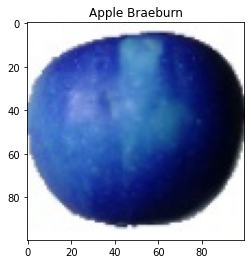

In [ ]:
plt.imshow(X_train[0])
plt.title(Y_train[0])
plt.savefig('grey_scale1.png')
plt.show()

# Chuyển dữ liệu hình ảnh theo đặc trưng HOG

In [ ]:
X_train = rescaledHog(X_train)
X_test  = rescaledHog(X_test)

In [ ]:
print(X_test.shape)

(1725, 4356)


# Chuẩn hóa dữ liệu

In [ ]:
from skimage import data, exposure

# Xây dựng model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# train model and store model
hog_knn_minkowski_3 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
hog_knn_minkowski_3.fit(X_train, Y_train)
joblib.dump(hog_knn_minkowski_3, '/content/drive/My Drive/Colab Notebooks/Models/hog_knn_minkowski_3.pkl')

hog_knn_minkowski_5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
hog_knn_minkowski_5.fit(X_train, Y_train)
joblib.dump(hog_knn_minkowski_5, '/content/drive/My Drive/Colab Notebooks/Models/hog_knn_minkowski_5.pkl')

hog_knn_minkowski_7 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski')
hog_knn_minkowski_7.fit(X_train, Y_train)
joblib.dump(hog_knn_minkowski_7, '/content/drive/My Drive/Colab Notebooks/Models/hog_knn_minkowski_7.pkl')

hog_knn_euclidean_3 = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
hog_knn_euclidean_3.fit(X_train, Y_train)
joblib.dump(hog_knn_euclidean_3, '/content/drive/My Drive/Colab Notebooks/Models/hog_knn_euclidean_3.pkl')

hog_knn_euclidean_5 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
hog_knn_euclidean_5.fit(X_train, Y_train)
joblib.dump(hog_knn_euclidean_5, '/content/drive/My Drive/Colab Notebooks/Models/hog_knn_euclidean_5.pkl')

hog_knn_euclidean_7 = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
hog_knn_euclidean_7.fit(X_train, Y_train)
joblib.dump(hog_knn_euclidean_7, '/content/drive/My Drive/Colab Notebooks/Models/hog_knn_euclidean_7.pkl')


['/content/drive/My Drive/Colab Notebooks/Models/hog_knn_euclidean_7.pkl']

In [ ]:
from sklearn.svm import SVC

In [ ]:
# train model and store model
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
joblib.dump(svm, '/content/drive/My Drive/Colab Notebooks/Models/hog_svm.pkl')

['/content/drive/My Drive/Colab Notebooks/Models/hog_svm.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# train model and store model
lgr = LogisticRegression(random_state = 0, max_iter=70000)
lgr.fit(X_train, Y_train)
joblib.dump(lgr, '/content/drive/My Drive/Colab Notebooks/Models/hog_lgr.pkl')

['/content/drive/My Drive/Colab Notebooks/Models/hog_lgr.pkl']

In [ ]:
loaded_model = joblib.load('/content/drive/My Drive/Colab Notebooks/Models/hog_knn_euclidean_7.pkl')

In [ ]:
y_pred = loaded_model.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy score: ", accuracy)

Accuracy score:  0.8718840579710145


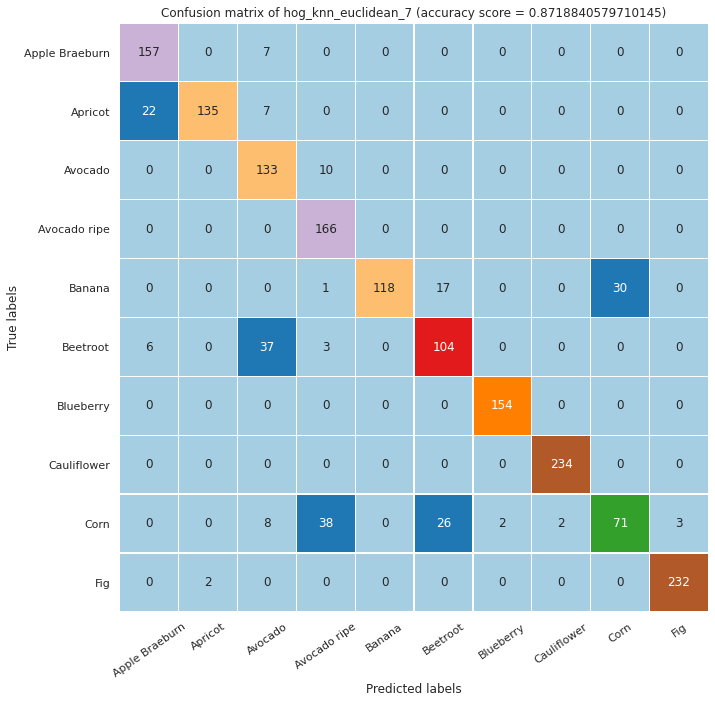

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in labels], columns=[i for i in labels])

plt.figure(figsize=(10, 10))

sns.set(font_scale=1)

plt.title('Confusion matrix of hog_knn_euclidean_7 (accuracy score = {})'.format(str(accuracy)))

ax = sns.heatmap(df_cm, annot=True, square=True, fmt='d', linewidths=.2, cbar=0, cmap = "Paired")
ax.set_xticklabels(ax.get_xticklabels(), rotation=35)

plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.tight_layout()

plt.savefig('/content/drive/My Drive/Colab Notebooks/Confusion matrix/cm_hog_knn_euclidean_7.png')

plt.show()